C'est le début de la fin


In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import random
import math 

In [4]:
# Ouvrir et lire le fichier CSV
# URL du fichier CSV
csv_url = 'https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975'

# Lire le fichier CSV depuis l'URL dans un DataFrame
df_festival = pd.read_csv(csv_url, sep = ';')
#print(df_festival.head())

I - On cherche à faire un histogramme des dates de création des festivals 

A) Certaines données de cette colonne sont des dates, qu'on converti en leur année

    Mais on a aussi un pb pc
    q certaines données sont "53ème" (??) 

In [5]:
col_array = np.array(df_festival['annee_de_creation_du_festival'])

# Fonction pour générer un nombre aléatoire dans la décennie
def annee_aleatoire(decennie):
    decennie_str = str(decennie)
    annees = re.findall(r'\d{4}', decennie_str)
    if annees:
        debut_decennie = int(annees[0])
        return np.random.randint(debut_decennie, debut_decennie + 10)
    else:
        return None

# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
col = np.array([float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year) if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date)) else float(date) if re.match(r'\d{4}$', str(date)) else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival']) for i, date in enumerate(col_array)])

# Créer une colonne dans le DataFrame initial
df_festival['annee_creation'] = col

# On crée un nouveau vecteur (?) sans les valeurs None pour pouvoir faire des plots
col_None = [x for x in col if x is not None]

# Afficher le DataFrame mis à jour
#print(df_festival[['annee_de_creation_du_festival', 'annee_creation']])


B) On se sert de cette colonne pour faire un histogramme


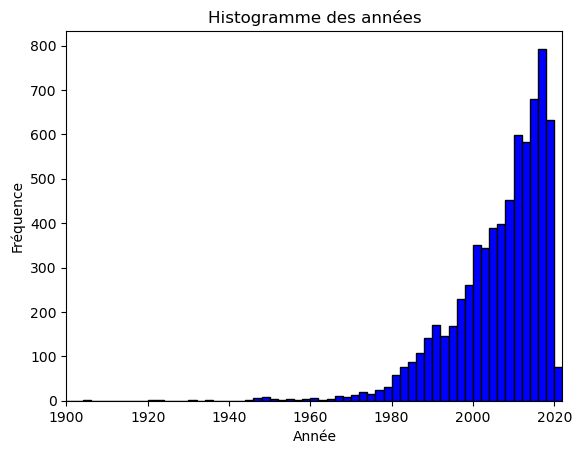

In [6]:

#Afficher l'histogramme 

plt.hist(col_None, bins=np.arange(1900, max(col_None) + 2, 2), color='blue', edgecolor='black')
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.title('Histogramme des années')
plt.xlim(1900, max(col_None))
plt.show()

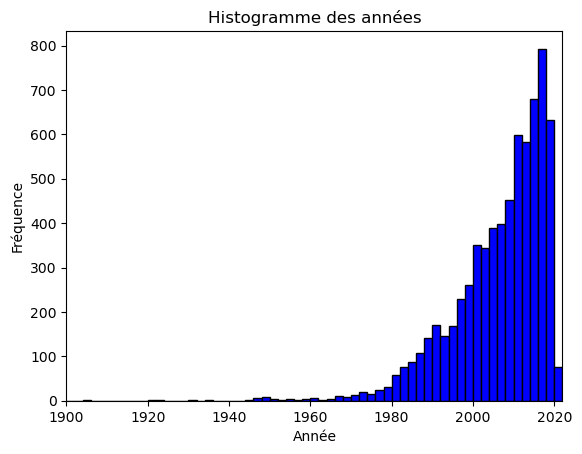

C) On nettoye la base commune 


In [7]:
# Chemin vers le fichier Excel (XLSX)
xlsx_file_path = '/Users/maelieperier/OneDrive/2A/ENSAE/base-cc-evol-struct-pop-2019.xlsx'

# Lire le fichier Excel dans un DataFrame
df = pd.read_excel(xlsx_file_path)

# Chemin de destination pour le fichier CSV
csv_commune = '/Users/maelieperier/OneDrive/2A/ENSAE/base-cc-evol-struct-pop-2019.csv'

# Convertir le DataFrame en fichier CSV
df.to_csv(csv_commune, index=False)

# Afficher les premières lignes du DataFrame converti en CSV
df_csv = pd.read_csv(csv_commune)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_11348/764890673.py:14: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_commune)


In [8]:
nouvelles_colonnes = {
    'Chiffres détaillés – Évolution et structure de la population': 'code_insee_commune', 
    'Unnamed: 1': 'Région',
    'Unnamed: 2': 'Département',
    'Unnamed: 3': 'Libellé géographique', 
    'Unnamed: 4': 'Population en 2019 (princ)',
    'Unnamed: 5': 'Pop 0-14 ans en 2019 (princ)',
    'Unnamed: 6': 'Pop 15-29 ans en 2019 (princ)',
    'Unnamed: 7': 'Pop 30-44 ans en 2019 (princ)',
    'Unnamed: 8': 'Pop 45-59 ans en 2019 (princ)',
    'Unnamed: 9': 'Pop 60-74 ans en 2019 (princ)', 
    'Unnamed: 10': 'Pop 75-89 ans en 2019 (princ)',
    'Unnamed: 11': 'Pop 90 ans ou plus en 2019 (princ)',  
    'Unnamed: 54': 'Pop 15 ans ou plus en 2019 (compl)',
    'Unnamed: 55': 'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 
    'Unnamed: 56': 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
    'Unnamed: 57': 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 
    'Unnamed: 58': 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
    'Unnamed: 59': 'Pop 15 ans ou plus Employés en 2019 (compl)', 
    'Unnamed: 60': 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 
    'Unnamed: 61': 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
    'Unnamed: 62': 'Pop 15 ans ou plus Autres en 2019 (compl)'
    }

df_csv = df_csv.rename(columns=nouvelles_colonnes)

#print(df_csv.columns)

# Épurer la base de données (conserver que les colonnes et lignes utiles, arrondir population...)

colonnes_a_conserver = ['code_insee_commune', 'Région', 'Département', 
                        'Libellé géographique', 'Population en 2019 (princ)', 
                        'Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 'Pop 30-44 ans en 2019 (princ)', 
                        'Pop 45-59 ans en 2019 (princ)', 'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                        'Pop 90 ans ou plus en 2019 (princ)', 'Pop 15 ans ou plus en 2019 (compl)', 
                        'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                        'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
                        'Pop 15 ans ou plus Employés en 2019 (compl)', 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
                        'Pop 15 ans ou plus Autres en 2019 (compl)']



df_csv = df_csv[colonnes_a_conserver]
df_communes = df_csv.drop(index=[0,1,2]).reset_index(drop=True)

# Transformer en int les éléments des colonnes numériques (qui ont des types ≠)

for colonne in df_communes.columns[4:]:
    df_communes[colonne][2:] = pd.to_numeric(df_communes[colonne][2:], errors='coerce').round().astype('Int64')


On crée une nouvelle colonne qui nous donne la tranche d'âge majoritaire dans chaque commune, c'est un proxy de moyenne d'âge des habitants. 
On fait en sorte de numéroter les différentes tranches d'âge afin de pouvoir les comparer entre elles plus tard

In [37]:
tranches_age = ['Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 
                'Pop 30-44 ans en 2019 (princ)', 'Pop 45-59 ans en 2019 (princ)', 
                'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                'Pop 90 ans ou plus en 2019 (princ)']

df_communes[tranches_age] = df_communes[tranches_age].apply(pd.to_numeric, errors='coerce')



tranchemax = df_communes[tranches_age].idxmax(axis=1)

tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_tranche'] = tranchemax.apply(lambda x: tranches_age.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_tranche'] = df_communes['numerotation_tranche'].astype('Int64') 

mapping_tranches_age = {
    0: '0 - Pop 0-14 ans en 2019 (princ)',
    1: '1 - Pop 15-29 ans en 2019 (princ)',
    2: '2 - Pop 30-44 ans en 2019 (princ)',
    3: '3 - Pop 45-59 ans en 2019 (princ)',
    4: '4 - Pop 60-74 ans en 2019 (princ)',
    5: '5 - Pop 75-89 ans en 2019 (princ)',
    6: '6 - Pop 90 ans ou plus en 2019 (princ)'
}

df_communes['tranche_age_majoritaire'] = (
    df_communes['numerotation_tranche'].map(mapping_tranches_age).astype(str) 
)

df_communes = df_communes.drop(columns=['numerotation_tranche'], errors='ignore')

#print(df_communes)

D) Merge des deux 


In [38]:
# Fusionner les DataFrames sur la colonne 'Code commune'
df_merged = pd.merge(df_festival, df_communes, on='code_insee_commune', how='left')

# Afficher les premières lignes du DataFrame résultant
df_merged.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,Pop 15 ans ou plus en 2019 (compl),Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),tranche_age_majoritaire
0,Tous courts,Départementale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Aix-en-Provence,13100,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,125617,199,4490,20110,18211,17305,7646,27613,30044,1 - Pop 15-29 ans en 2019 (princ)
1,Les enchanteurs,Régionale,Hauts-de-France,Pas-de-Calais,Aix-Noulette,62160,62019,246200364,CA de Lens - Liévin,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Corsica polar,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,59415,99,2358,3457,7751,12040,6488,15565,11656,2 - Pop 30-44 ans en 2019 (princ)
3,Festival international de la BD,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,59415,99,2358,3457,7751,12040,6488,15565,11656,2 - Pop 30-44 ans en 2019 (princ)
4,Les estivales,Intercommunale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Allauch,13190,13002,200054807,Métropole d'Aix-Marseille-Provence,NaN,...,17931,10,794,2145,3240,2675,1253,5405,2409,3 - Pop 45-59 ans en 2019 (princ)


E) Stats descriptives


E) 1- 

    Réparition des types de festivals 

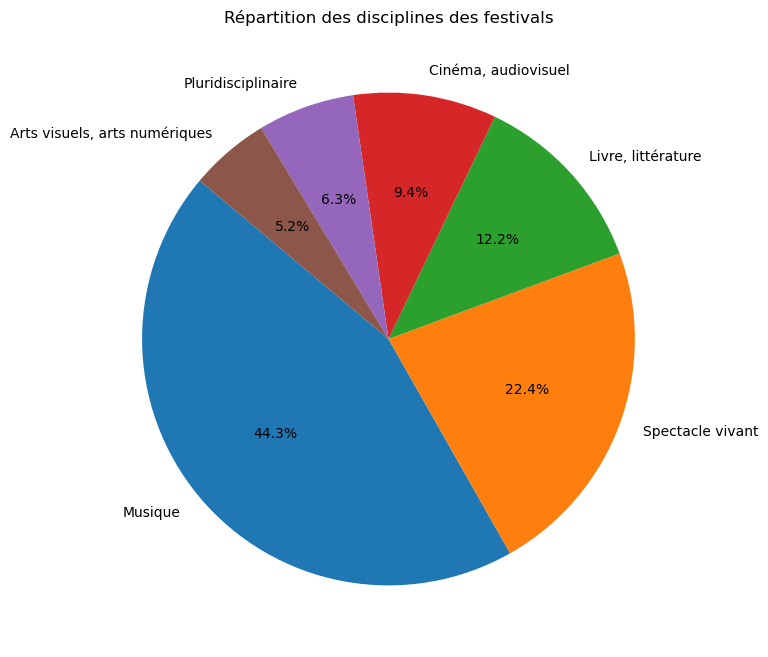

In [39]:
discipline_dom = df_festival['discipline_dominante'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(discipline_dom, labels= discipline_dom.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des disciplines des festivals')
plt.show()

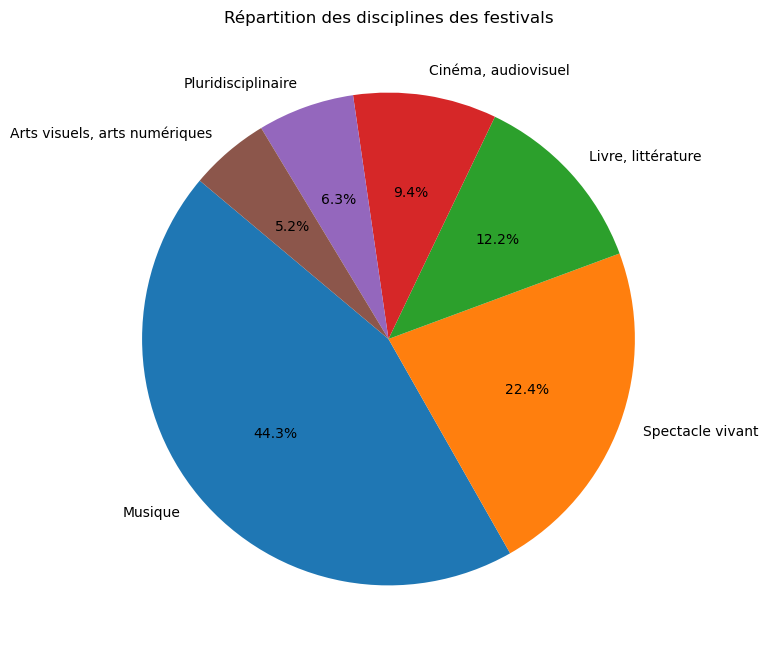

In [43]:
# Étape 1 : Sélectionner les festivals de musique classique
festivals_musique_classique = df_festival[df_festival['sous_categorie_musique_cnm'] == '11- Musique classique, lyrique, contemporaine, autres']

# Étape 2 : Sélectionner les festivals de musique électro et leurs communes associées
festivals_electro = df_festival[df_festival['sous_categorie_musique_cnm'] == '02- Musiques amplifiées ou électroniques']
communes_festivals_electro = festivals_electro['code_insee_commune'].unique()

# Étape 3 : Calculer la tranche d'âge majoritaire pour les communes de musique électro
tranche_age_majoritaire_electro = df_communes[df_communes['code_insee_commune'].isin(communes_festivals_electro)]['tranche_age_majoritaire'].mode().iloc[0]

# Étape 4 : Comparer la tranche d'âge des festivals de musique classique avec celle des communes de musique électro
festivals_selectionnes = festivals_musique_classique[
    festivals_musique_classique['tranche_age_majoritaire'].astype(str).str[0] > tranche_age_majoritaire_electro
]

# Afficher les résultats
print("Tranche d'âge majoritaire des communes de musique électro :", tranche_age_majoritaire_electro)
print("\nFestivals de musique classique avec tranche d'âge majoritaire plus élevée que dans les communes de musique électro :")
print(festivals_selectionnes)

KeyError: 'tranche_age_majoritaire'